PearsonRResult(statistic=0.384252865715387, pvalue=1.9029514676111369e-50)
PearsonRResult(statistic=0.3519935826650433, pvalue=4.513218155954134e-42)
PearsonRResult(statistic=0.4061252415056056, pvalue=1.095665405148898e-56)
Correlation between fearfulness and grip is -0.3685307581888738
Pearsonsr for fearfulness and grip is PearsonRResult(statistic=-0.3685307581888736, pvalue=3.0245574058639704e-46)
Correlation between anxiety and grip is -0.22921352311428064
Pearsonsr for anxiety and grip is PearsonRResult(statistic=-0.22921352311428056, pvalue=3.906109561484493e-18)
Correlation between dependence and grip is -0.21938093040559883
Pearsonsr for dependence and grip is PearsonRResult(statistic=-0.21938093040559883, pvalue=1.0453201911176203e-16)
Correlation between sentimentality and grip is -0.29305676451345125
Pearsonsr for sentimentality and grip is PearsonRResult(statistic=-0.2930567645134513, pvalue=4.159672834726434e-29)


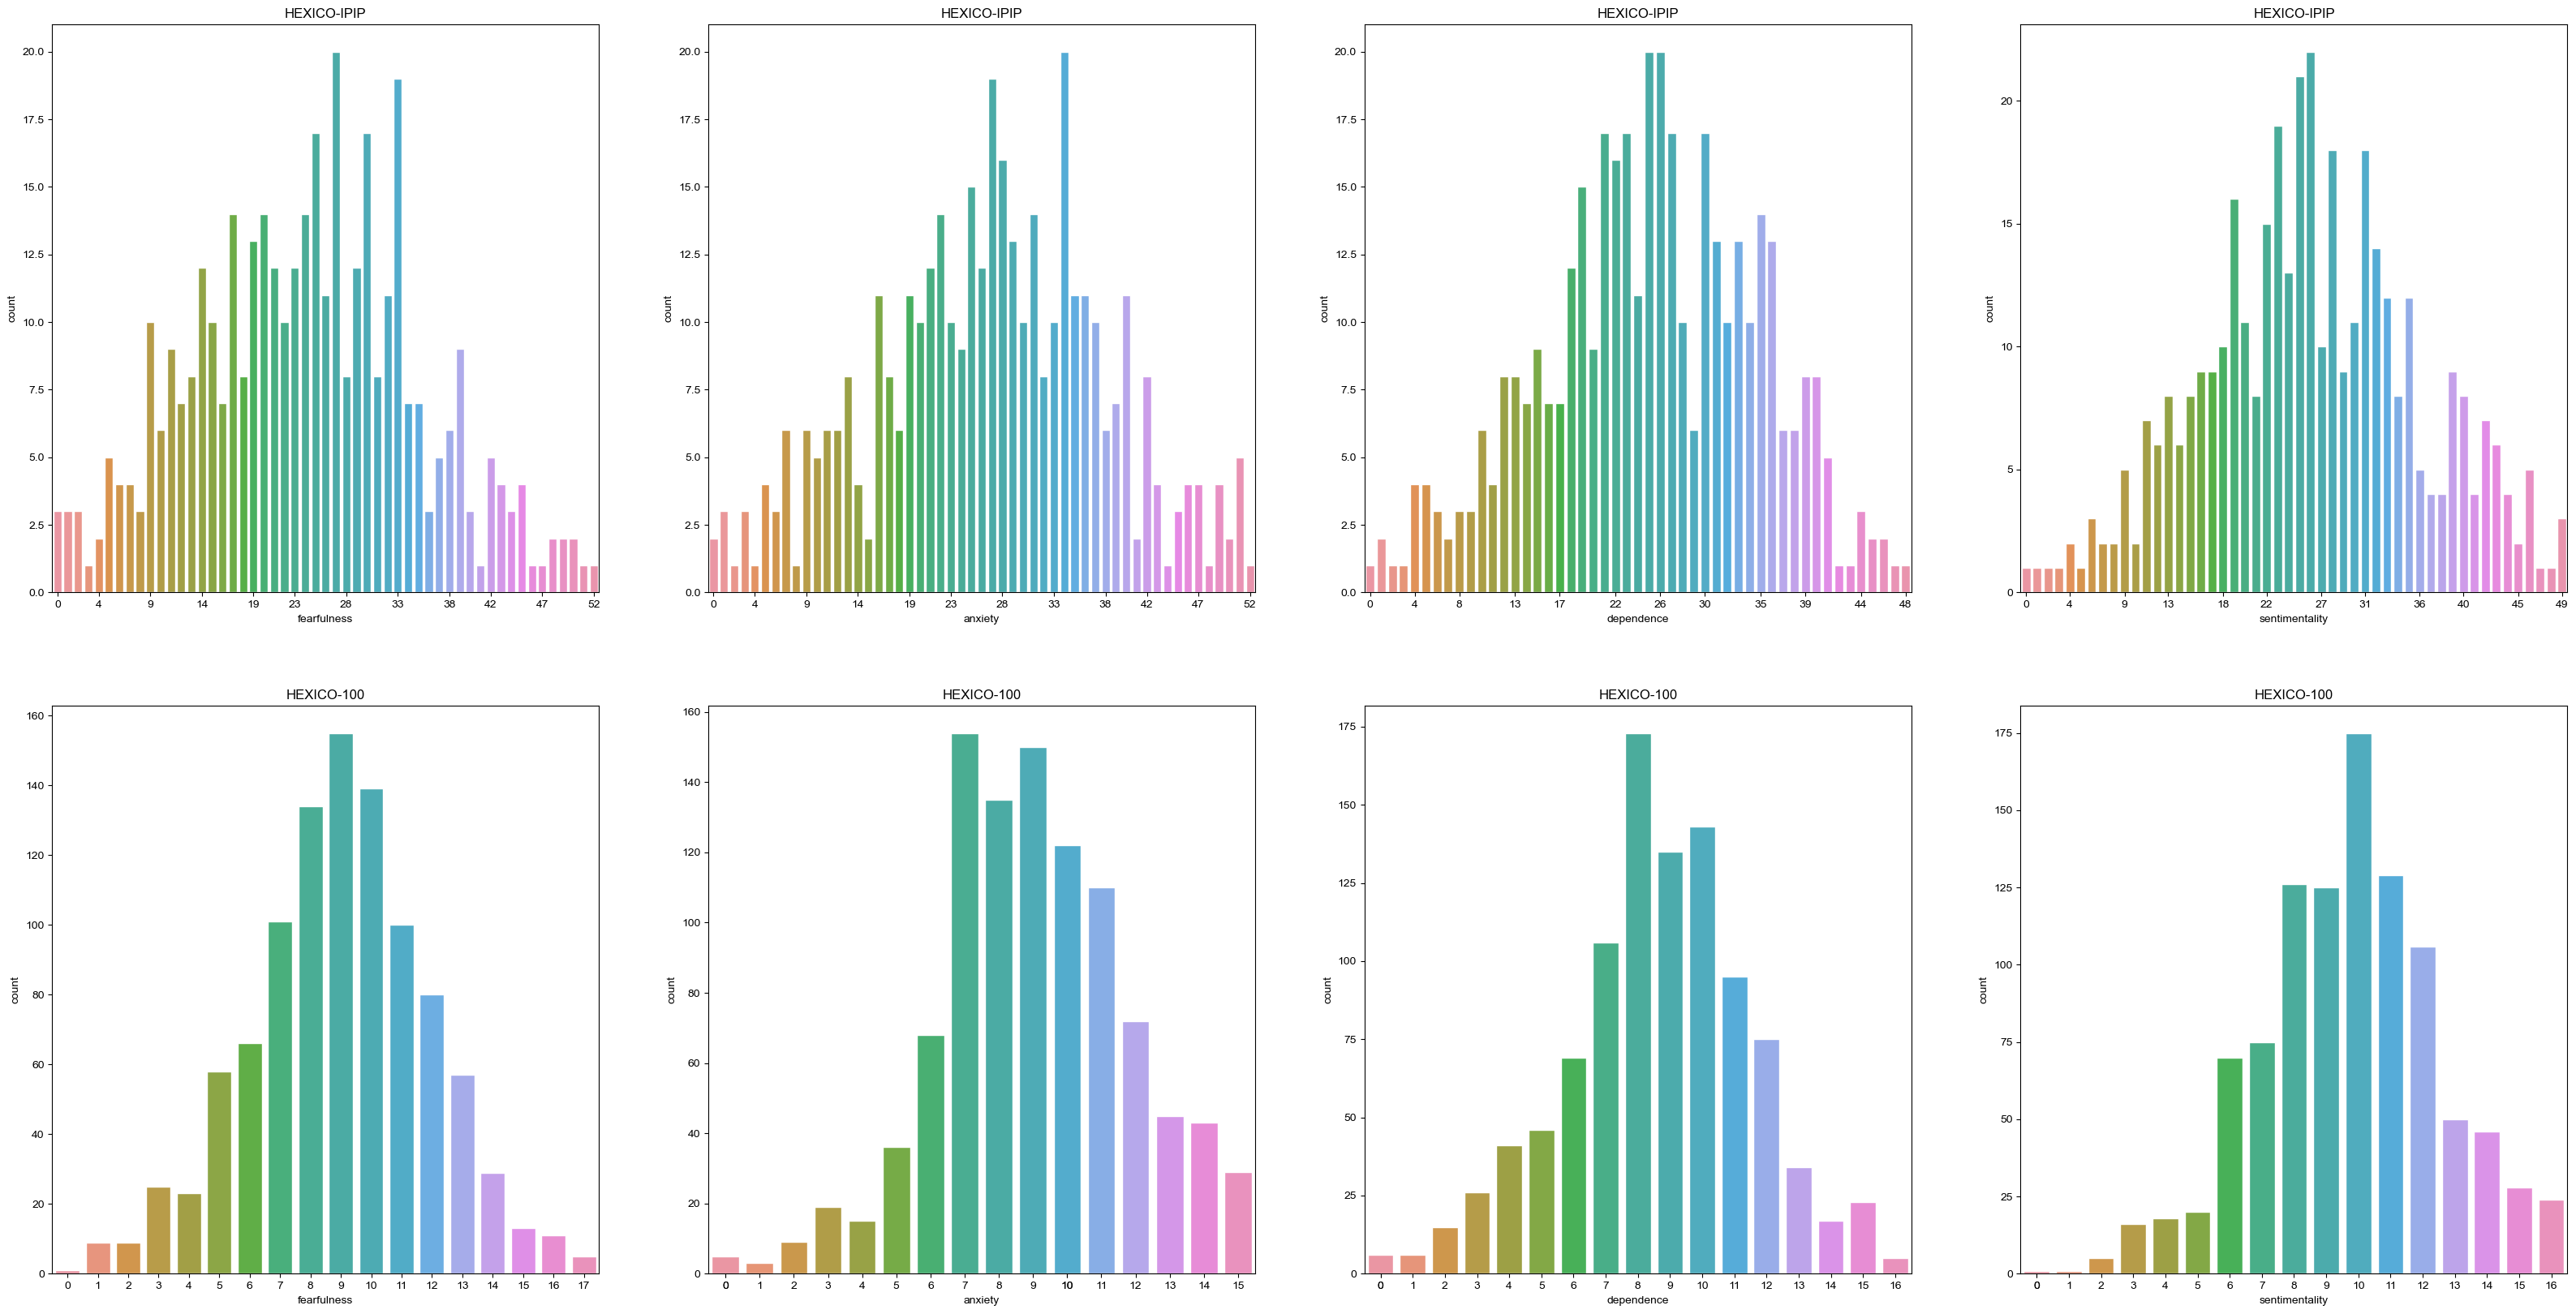

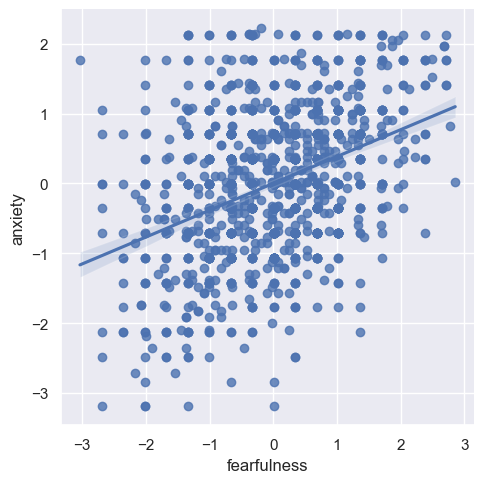

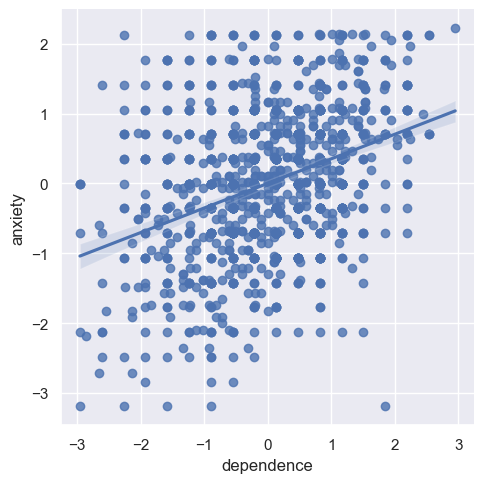

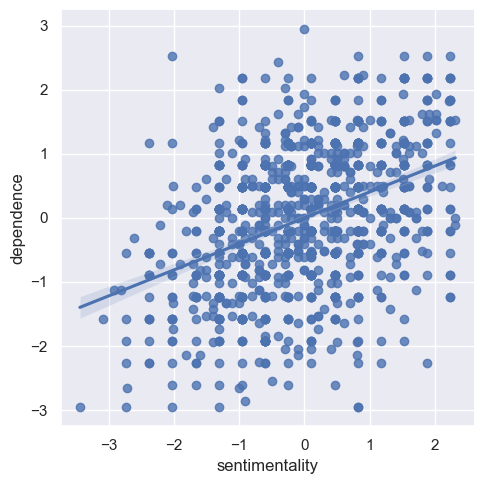

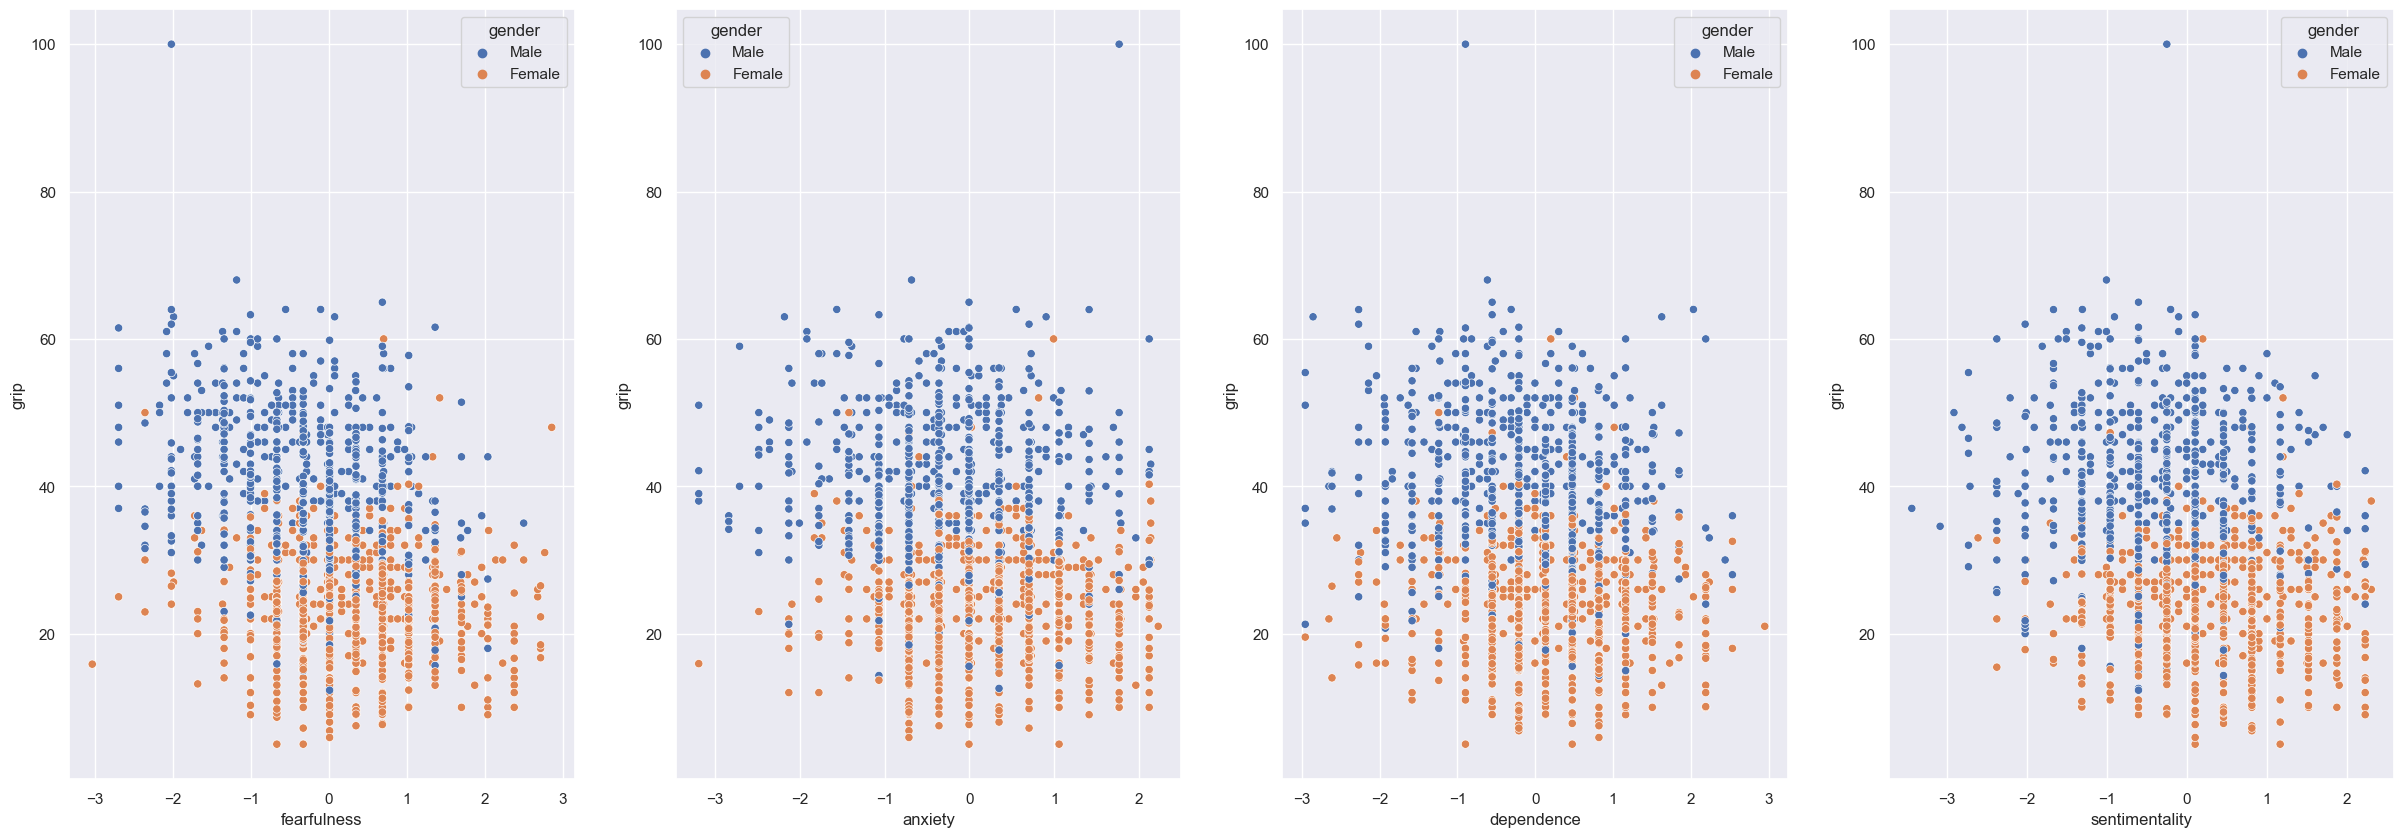

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

df1 = pd.read_csv('/Users/nicolefinney/Dropbox/Mac/Desktop/sqlite/hello/hello/physical strength data/archive (3)/Sample_1.csv')
df2 = pd.read_csv('/Users/nicolefinney/Dropbox/Mac/Desktop/sqlite/hello/hello/physical strength data/archive (3)/Sample_2.csv')
df3 = pd.read_csv('/Users/nicolefinney/Dropbox/Mac/Desktop/sqlite/hello/hello/physical strength data/archive (3)/Sample_3.csv')
df4 = pd.read_csv('/Users/nicolefinney/Dropbox/Mac/Desktop/sqlite/hello/hello/physical strength data/archive (3)/Sample_4.csv')
df5 = pd.read_csv('/Users/nicolefinney/Dropbox/Mac/Desktop/sqlite/hello/hello/physical strength data/archive (3)/Sample_5_corrected.csv')

df1.shape, df2.shape, df3.shape, df4.shape, df5.shape
# ((175, 46), (209, 44), (370, 22), (340, 20), (305, 21))

df1.columns,df2.columns,df3.columns,df3.columns,df5.columns

## Creates two new dataframes - samples 1 and 2 are similar and samples 3, 4, and 5 are similar in columns
df_1 = pd.concat([df1, df2], axis = 0, ignore_index=True)
df_1.drop(['age','ethnicity'], inplace=True, axis=1)
df_1['gender'] = df_1.female.map({0:'Male',1:'Female'})
df_1.drop('female',inplace=True, axis=1)

df_2 = pd.concat([df3, df4, df5], axis = 0, ignore_index=True)
df_2.drop(['chest','ethnicity'], inplace=True, axis=1)
df_2['gender'] = df_2.female.map({0:'Male',1:'Female'})
df_2.drop('female',inplace=True, axis=1)

## Finding null values
df_1.isnull().sum()
# 2 null values in chest strength - won't be using that so no big deal
df_2.isnull().sum()
# some null values in age - may or may not be an issue, come back later

# Reverse coding of negatively keyed items: IP, scored out of 7 (df_1)
# Items 6-10 for anxiety, fear, sentimentality
# Anxiety:
df_1['e_anx_6'] = df_1['e_anx_6'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_anx_7'] = df_1['e_anx_7'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_anx_8'] = df_1['e_anx_8'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_anx_9'] = df_1['e_anx_9'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_anx_10'] = df_1['e_anx_10'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})

#Fear:
df_1['e_fear_6'] = df_1['e_fear_6'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_fear_7'] = df_1['e_fear_7'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_fear_8'] = df_1['e_fear_8'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_fear_9'] = df_1['e_fear_9'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_fear_10'] = df_1['e_fear_10'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})

#Sentimentality
df_1['e_sen_6'] = df_1['e_sen_6'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_sen_7'] = df_1['e_sen_7'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_sen_8'] = df_1['e_sen_8'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_sen_9'] = df_1['e_sen_9'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
df_1['e_sen_10'] = df_1['e_sen_10'].map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})

#Reverse coding for hex items (df_2)
# items 29, 35, 41, 59, 77, 89, and 95 need to be reversed
df_2['hex_29'] = df_2['hex_29'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df_2['hex_35'] = df_2['hex_35'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df_2['hex_41'] = df_2['hex_41'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df_2['hex_59'] = df_2['hex_59'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df_2['hex_77'] = df_2['hex_77'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df_2['hex_89'] = df_2['hex_89'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df_2['hex_95'] = df_2['hex_95'].map({1:5, 2:4, 3:3, 4:2, 5:1})

# Creating new total columns using reverse scores
# df_1 (IP) scores
df_1['anxiety'] =  df_1[['e_anx_1',
                         'e_anx_2',
                         'e_anx_3',
                         'e_anx_4',
                         'e_anx_5',
                         'e_anx_6',
                         'e_anx_7',
                         'e_anx_8',
                         'e_anx_9',
                         'e_anx_10']].sum(axis=1)
df_1['dependence'] =  df_1[['e_dep_1',
                         'e_dep_2',
                         'e_dep_3',
                         'e_dep_4',
                         'e_dep_5',
                         'e_dep_6',
                         'e_dep_7',
                         'e_dep_8',
                         'e_dep_9',
                         'e_dep_10']].sum(axis=1)
df_1['fearfulness'] =  df_1[['e_fear_1',
                         'e_fear_2',
                         'e_fear_3',
                         'e_fear_4',
                         'e_fear_5',
                         'e_fear_6',
                         'e_fear_7',
                         'e_fear_8',
                         'e_fear_9',
                         'e_fear_10']].sum(axis=1)
df_1['sentimentality'] =  df_1[['e_sen_1',
                         'e_sen_2',
                         'e_sen_3',
                         'e_sen_4',
                         'e_sen_5',
                         'e_sen_6',
                         'e_sen_7',
                         'e_sen_8',
                         'e_sen_9',
                         'e_sen_10']].sum(axis=1)

# Making sure we have our new columns for df_1
df_1.head()

#Creating total columns for our hex scores (df_2)
df_2['fearfulness'] =  df_2[['hex_5',
                             'hex_29',
                             'hex_53',
                             'hex_77']].sum(axis=1)
df_2['anxiety'] =  df_2[['hex_11',
                             'hex_35',
                             'hex_59',
                             'hex_83']].sum(axis=1)
df_2['dependence'] =  df_2[['hex_17',
                             'hex_41',
                             'hex_65',
                             'hex_89']].sum(axis=1)
df_2['sentimentality'] =  df_2[['hex_23',
                             'hex_47',
                             'hex_71',
                             'hex_95']].sum(axis=1)

df_2.head()

#Now that we have total columns for each of our variables, we can explore a bit.


#Plotting the distributions for each of the traits we can see that it has a normal distribution.
fig, axes = plt.subplots(2, 4, figsize = (40,20))
sns.set(font_scale=1)
traits = ['fearfulness', 'anxiety', 'dependence', 'sentimentality']

counter = 0
for trait in traits:
    sns.countplot(x = trait,data = df_1, ax = axes[0, counter])
    xmin, xmax = axes[0, counter].get_xlim()
    custom_ticks = np.linspace(0, xmax, 12, dtype=int)
    axes[0, counter].set_xticks(custom_ticks)
    axes[0, counter].set_xticklabels(custom_ticks)
    axes[0, counter].set_title('HEXICO-IPIP')
    
    
    sns.countplot(x = trait, data = df_2, ax = axes[1,counter])
    xmin, xmax = axes[1, counter].get_xlim()
    custom_ticks = np.linspace(0, xmax, 18, dtype=int)
    axes[1, counter].set_xticks(custom_ticks)
    axes[1, counter].set_xticklabels(custom_ticks)
    axes[1, counter].set_title('HEXICO-100')
    counter +=1

# Standardizing data
def standardize(df, traits):
    df_stand = df[traits]
    df[traits] = (df_stand - df_stand.mean())/df_stand.std()
    return df

df_1 = standardize(df_1, traits)
df_2 = standardize(df_2, traits)

# Joining the two datasets
df_1.grip = df_1.grip.astype('float')

df_merged = pd.concat([df_1, df_2], join = 'inner')
df_merged.head()

## Do fearfulness and anxiety correlate with each other?
sns.lmplot(data=df_merged, x='fearfulness', y='anxiety')
from scipy import stats
coefficient = stats.pearsonr(df_merged['fearfulness'], df_merged['anxiety'], alternative = 'two-sided')
print(coefficient)
np.corrcoef(df_merged['fearfulness'],df_merged['anxiety']) [0,1]
    # very low p value - they are significantly correlated

## Do dependence and anxiety correlate with each other?
sns.lmplot(data=df_merged, x='dependence', y='anxiety')
from scipy import stats
coefficient = stats.pearsonr(df_merged['dependence'], df_merged['anxiety'], alternative = 'two-sided')
print(coefficient)
np.corrcoef(df_merged['dependence'],df_merged['anxiety']) [0,1]
    # Dependence and anxiety are significantly correlated with each other

## Do sentimentality and dependence correlate with each other?
sns.lmplot(data=df_merged, x='sentimentality', y='dependence')
from scipy import stats
coefficient = stats.pearsonr(df_merged['sentimentality'], df_merged['dependence'], alternative = 'two-sided')
print(coefficient)
np.corrcoef(df_merged['sentimentality'],df_merged['dependence']) [0,1]
    #Sentimentality and dependence are significantly correlated with one another

#How do each of the four traits across both studies correlate with grip?
fig, axes = plt.subplots(1, 4, figsize = (30,10))
traits = ['fearfulness', 'anxiety', 'dependence', 'sentimentality']
counter = 0
for trait in traits:
    sns.scatterplot(ax = axes[counter], x = trait, y = 'grip', hue = 'gender', data = df_merged)
    counter += 1
    print('Correlation between', trait, 'and grip is', df_merged[trait].corr(df_merged.grip))
    print('Pearsonsr for', trait, 'and grip is', stats.pearsonr(df_merged[trait], df_merged.grip))
## All 4 traits were found to be negatively correlated with grip with a significant p value.